In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, linear_model, metrics

In [422]:
df = pd.read_csv('salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [424]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


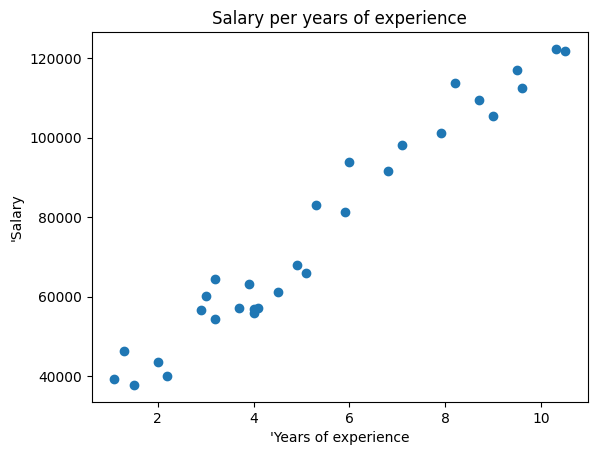

In [425]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.title("Salary per years of experience")
plt.xlabel("'Years of experience")
plt.ylabel("'Salary")
plt.draw()

In [426]:
df['YearsExperience'].corr(df['Salary'])
#df.corr(method='pearson')

np.float64(0.9782416184887599)

In [427]:
X= df['YearsExperience'].values
X = X.reshape(-1,1)
y= df['Salary']
X.shape

(30, 1)

In [428]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [429]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [430]:
predictions = model.predict(X_test)
predictions

array([41420.22349239, 74944.30450119, 69356.95766639, 57251.03952433,
       90775.12053313, 73081.85555626])

In [431]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print(f'RMSE = {rmse} ({rmse/np.mean(predictions)*100:3.3}%)')


RMSE = 5720.56359148434 (8.44%)


In [432]:
# R2 
train_r2 = model.score(X_train,y_train)
test_r2 = model.score(X_test,y_test)
print('Model determination train: ', train_r2 )
print('Model determination test: ', test_r2 )
# Adj R2 -> tylko przy wielu cechach + trzeba liczyć samemu więc na szkoleniach zaawansowanych

Model determination train:  0.9593329040224576
Model determination test:  0.8752979692773796


In [433]:
print("Intercept(b):",model.intercept_)
print("Slope(a):",model.coef_[0])

Intercept(b): 27451.856405393213
Slope(a): 9312.244724666889


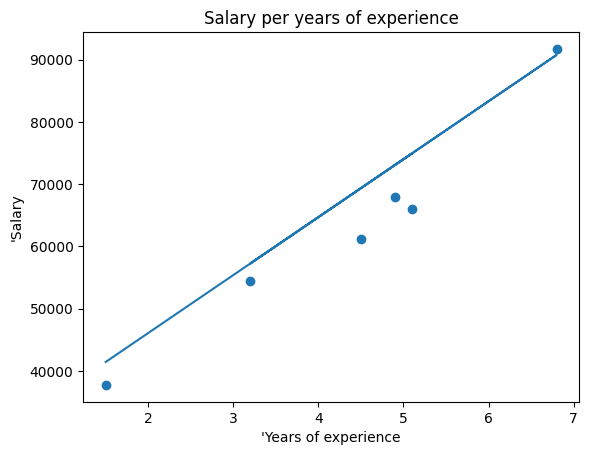

In [434]:
plt.scatter(X_test,y_test)
plt.plot(X_test,predictions)
plt.title("Salary per years of experience")
plt.xlabel("'Years of experience")
plt.ylabel("'Salary")

plt.draw()

In [442]:
# szybkie przeczytanie dla danej wartości:
model.predict([[3]])

array([55388.59057939])